### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([133,213,225,442,485,490,507,508,1007,1049,1059,1106,1107,1111,1113,1138,1173,1177,1221,1224,1287,1288,1289,1291,1292,1293,1294,1295,1296,1297,1298,1301,1313,1314,1396,1445,1467,1478,1479,1487,1518,1525,1526,1527,1528,1529,1530,1591,1600,1603,1615,1616,1624,1634,1635,1656,1671,1680,1734,1740,1741,1742,1743,1745,1761,1762,1763,1764,1798,1799,1833,1855,1858,1859,1896,1899,1906,1913,1925,1950,1963,2001,2010,2028,2039,2050,2051,2079,2096,2099,2101,2103,2107,2108,2110,2138,2156,2158,2176,2185,2209,2210,2236,2237,2238,2239,2240,2241,2244,2275,2278,2323,2324,2339,2344,2345,2370,2371,2373,2375,2376,2377,2379,2380,2382,2383,2433,2472,2502,2503,2543,2549,2748,2860,2863,3160,3186,3245,3347,3377,3389,3455,3532,3533,3680,3708,3794,3822,3880,4187,4198,4321,4344,4349,4449,4481,4518,4577,4591,4592,4617,4778,4903,5176,5204,5205,5267,5313,5413,5432,5560,5561,5585,5606,5725,5726,5727,5728,5729,5730,5731,5732,5733,5734,5735,5736,5880,6060,6215,6216,6217,6223,6224,6225,6226,6227,6228,6249,6283,6412,6418,6419,6421,6423,6425,6427,6449,6484,6522,6748,6804,6805,6890,6970,6977,6979,6990,7000,7030,7109,7283,7312,7330,7410,7674,7791,7927,7936,8028,8052,8351,8369,8370,8371,8465,8775,8894,8900,8903,8904,8983,9075,9083,9106,9165,9166,9251,9707,9990,9997,10070,10100,10183,10227,10267,10269,10368,10446,10466,10508,10765,10834,10836,10858,10930,10931,10933,10970,10971,10972,10986,11004,11061,11148,11151,11168,11177,11205,11207,11209,11221,11304,11305,11306,11344,11370,11382,11384,11455,11461,11498,11538,11643,11678,11692,11722,11723,11725,11865,11903,11914,11944,11992,12058,12060,12064,13182,13193,13414,13511,13572,13850,14160,14225,14335,14383,14444,14620,14832,15048,15328,15332,15712,15757,15806,15845,15973,15992,16101,16138,16279,16280,16601,16648,16671,16779,16889,16922,17028,17029,17231,17285,17436,17608,17610,17744,17745,17746,17747,17912,18100,18106,18113,18288,18490,18494,18655,18674,18678,18749,18881,18907,18934,19007,19455,19595,19760,19761,19762,19763,19935,20204,20227,20270,20274,20534,20619,20763,20816,20817,20838,20933,21075,21076,21104,21125,21128,21466,21497,21498,21512,21774,21887,21888,22253,22276,22380,22613,22817,22900,22933,23050,23272,23276,23512,23513,23514,23626,23865,23974,24015,24018,24174,24199,24239,24254,24281,24393,24394,24395,24423,24446,24447,24448,24449,24524,24525,24577,24578,24580,24776,24777,24778,24794,24886,25358,25422,25497,25502,25675,25720,25721,25790,25831,25904,25947,26201,26260,26386,26499,26547,26675,26732,26733,26734,26735,26736,26741,26742,26748,26799,26862,26942,26943,27041,27047,27384,27385,27386,27422,27424,27551,27567,27570,27641,27642,27643,27661,27688,27813,27940,28143,28191,28672,28966,29076,29077,29159,29267,29293,29295,29416,29431,29439,29440,29575,30108,30125,30142,30208,30209,30275,30374,30413,30467,30894,30954,30960,30961,30962,30963,31119,31120,31121,31127,31429,31591,32382,32471,32478,32493,32528,32531,32582,32704,32801,32830,32902,32903,32904,32905,32906,32907,32908,32909,32912,32913,32914,32920,32988,33020,33047,33048,33049,33050,33051,33052,33053,33054,33055,33056,33057,33058,33060,33281,33314,33337,33339,33340,33386,33444,33445,33552,33596,33921,34089,34346,34385,34548,34604,34670,34671,34672,34673,34674,34675,34761,34762,34763,34900,35064,35157,35186,35355,35494,35508,35659,35660,35661,35849,36055,36209,36576,36701,36757,36885,37360,37535,37565,37572,37714,37720,37730,37769,37813,37906,37907,37921,37922,37925,37926,37927,37928,38427,38429,38430,38431,38432,38433,38434,38435,38436,38437,38438,38439,38440,38441,38442,38443,38444,38445,38446,38447,38457,38458,38459,38466,38519,38542,38591,38774,38786,39068,39121,39127,39149,39199,39267,39302,39433,39587,39688,39693,39755,39902,40163,40244,40245,40363,40365,40410,40449,40462,40602,40624,40644,40827,40836,40887,40971,40972,41045,41101,41103,41173,41241,41242,41354,41360,41554,41592,41677,41679,41680,41684,41964,42451,42452,42519,42536,42637,42689,42795,42800,43121,43568,43640,43859,43861,43954,44048,44226,44251,44282,44285,44348,44526,44651,44685,44689,44701,44706,44712,44780,44782,44786,44787,44788,44789,44790,44791,44792,44969,45049,45073,45131,45202,45417,45436,45439,45616,45707,45820,45862,45863,45865,46124,46125,46126,46268,46305,46307,46332,46356,46573,46635,46649,46764,47225,47249,47402,47602,47660,47716,47756,47760,47793,47794,47977,48049,48188,48234,48299,48431,48448,48659,48694,48800,48916,49102,49103,49104,49110,49365,49486,49487,49550,49551,49552,49604,49721,49854,49859,49860,49862,49987,49998,50031,50032,50067,50082,50296,50459,50489,50684,50809,51096,51097,51098,51110,51125,51126,51157,51284,51362,51409,51458,51700,51715,52046,52357,52381,52736,52737,53033,53098,53125,53130,53402,53510,53554,53555,53798,53853,54025,54462,54472,54502,54580,54581,54603,54604,54624,54625,54626,54627,54644,54669,54774,55077,55150,55161,55268,55386,55422,55436,55470,55472,55525,55535,55766,55970,56093,56251,56252,56253,56274,56318,56463,56485,56486,56490,56600,56601,56878,57105,57114,57181,57184,57611,57663,57689,57723,57734,57778,57975,58018,58302,58303,58364,58365,58373,58424,58438,58478,58511,58543,58554,58710,58719,58720,58785,58812,58832,59199,59229,59501,59575,59713,60251,60290,60391,60792,60844,60845,60986,61033,61153,61187,61253,61259,61483,61492,61494,61512,61518,61519,61532,61625,61751,61799,61801,61802,61803,61804,61805,61806,61807,61808,61875,61876,62132,62133,62134,62135,62136,62137,62138,62139,62140,62141,62142,62143,62144,62145,62146,62147,62148,62149,62150,62151,62152,62153,62154,62155,62156,62157,62158,62159,62161,62162,62163,62164,62165,62166,62167,62168,62169,62170,62171,62172,62173,62174,62175,62176,62177,62178,62179,62180,62181,62182,62183,62184,62185,62186,62187,62188,62189,62190,62191,62192,62193,62194,62195,62196,62197,62198,62199,62200,62201,62202,62203,62204,62620,62638,62853,62854,62855,62856,62866,63006,63066,63083,63221,63302,63539,64031,64032,64043,64190,64201,64202,64204,64205,64206,64207,64208,64272,64309,64341,64414,64570,64669,64733,64763,64821,64829,64869,64870,64991,65105,65175,65222,65705,65732,65786,65808,65951,65952,66025,66026,66559,66563,66627,66629,66652,66657,66667,66668,66669,66670,66804,66983,67037,67135,67136,67676,67696,67753,68205,68271,68356,68430,68438,68531,68583,68709,68842,68843,68852,69156,69187,69254,69409,69567,69647,69648,69650,69722,69922,70018,70052,70063,70083,70287,70328,70513,70700,70703,70708,70709,70710,70713,70714,70752,70978,71118,71193,71496,71522,71547,71548,71636,71732,71733,71734,71952,71953,72288,72399,72542,72547,72573,72811,72812,73071,73094,73153,73395,73621,73632,73816,73836,73848,73922,74011,74058,74178,74285,74351,74435,74490,74852,75057,75065,75130,75223,75236,75266,75366,75521,75869,76135,76386,76441,76577,76590,76592,76604,76605,76700,76701,76702,76704,76705,76706,76707,76708,76722,76770,76771,76790,76791,76969,76983,77073,77086,77203,77204,77775,77806,77865,78105,78206,78207,78208,78276,78700,78701,78811,78830,78915,78991,78992,79045,79105,79187,79199,79200,79321,79329,79473,79820,79881,79949,79952,80223,80267,80290,80291,80304,80406,80679,80768,80859,81171,81172,81174,81175,81176,81177,81180,81456,81457,81485,81547,81548,81572,81593,81695,81705,81713,81714,81715,81716,81717,81817,81851,81853,82067,82068,82234,82236,82497,82518,82697,82698,82699,82700,82741,82804,82998,83195,83252,83287,83295,83296,83303,83304,83816,83871,83889,84018,84116,84138,84238,84401,84436,84442,84444,84445,84522,84552,84721,84723,84733,84735,84736,84737,84738,84739,84740,84742,84748,84749,84756,85011,85155,85175,85189,85218,85243,85446,85535,85552,85624,85741,86250,86325,86343,86352,86425,86688,86928,87080,87143,87144,87145,87182,87211,87582,87809,88088,88316,88442,88473,88520,88521,88526,88528,88529,88530,88660,88680,89003,89094,89356,89382,89569,89699,89859,89874,89941,89989,90077,90154,90218,90224,90264,90387,90388,90389,90391,90393,90398,90454,90462,90463,90680,90701,90816,90835,91129,91383,91386,91703,91769,91770,91781,91807,91828,92043,92044,92045,92046,92183,92203,92204,92205,92222,92250,92387,92396,92681,92868,93033,93078,93085,93153,93246,93248,93254,93286,93287,93288,93289,93290,93291,93406,93492,93520,93560,93575,93576,93616,93617,93618,93826,94085,94171,94252,94253,94254,94274,94370,94371,94372,94432,94670,94838,94847,94867,94882,94913,95268,95413])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(1416, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(1001820,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

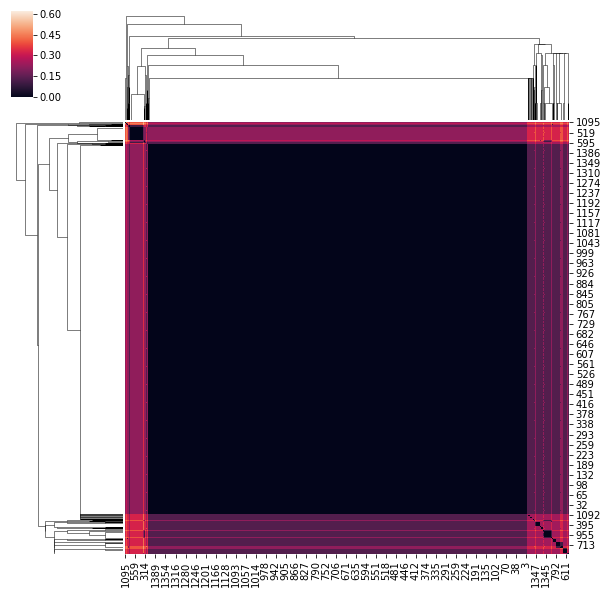

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

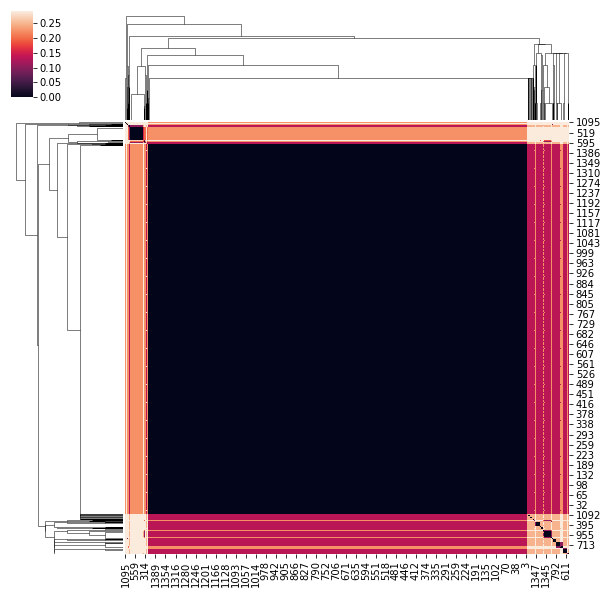

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

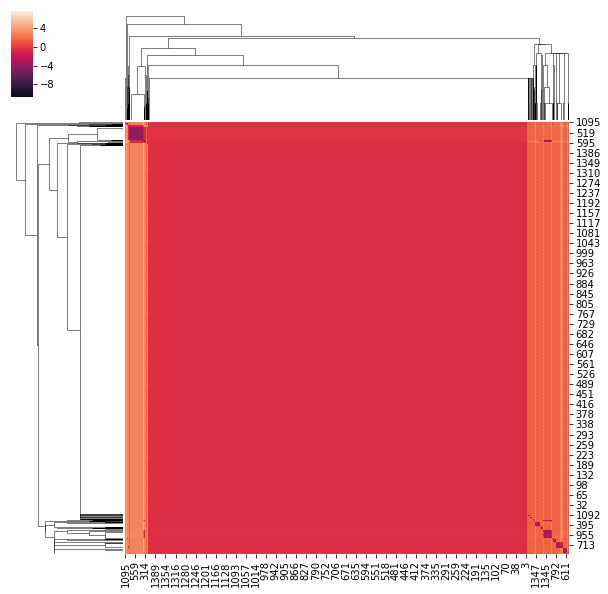

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

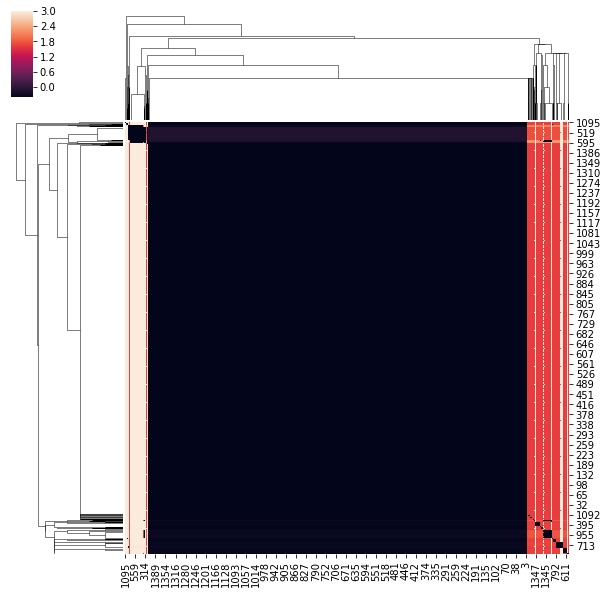

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)